# BEGINNER TASK-3 : Music Recommendation using WSDM - KKBox's Music Recommendation Challenge Dataset

IMPORTING NECESSARY LIBRARIES FOR READING THE DATASET

In [1]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble, metrics
import xgboost as xgb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

IMPORTING THE DATASET AND PREPROCESSING

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [4]:
df.shape

(7377418, 6)

In [5]:
df = df.sample(frac=0.1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737742 entries, 4031481 to 2222985
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   msno                737742 non-null  object
 1   song_id             737742 non-null  object
 2   source_system_tab   735310 non-null  object
 3   source_screen_name  696275 non-null  object
 4   source_type         735612 non-null  object
 5   target              737742 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 39.4+ MB


In [7]:
songs = pd.read_csv('songs.csv')

In [8]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [9]:
df = pd.merge(df, songs, on='song_id', how='left')
del songs

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737742 entries, 0 to 737741
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   msno                737742 non-null  object 
 1   song_id             737742 non-null  object 
 2   source_system_tab   735310 non-null  object 
 3   source_screen_name  696275 non-null  object 
 4   source_type         735612 non-null  object 
 5   target              737742 non-null  int64  
 6   song_length         737726 non-null  float64
 7   genre_ids           725753 non-null  object 
 8   artist_name         737726 non-null  object 
 9   composer            570449 non-null  object 
 10  lyricist            420098 non-null  object 
 11  language            737723 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 73.2+ MB


In [11]:
members = pd.read_csv('members.csv')

In [12]:
df = pd.merge(df, members, on='msno', how='left')
del members

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737742 entries, 0 to 737741
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   msno                    737742 non-null  object 
 1   song_id                 737742 non-null  object 
 2   source_system_tab       735310 non-null  object 
 3   source_screen_name      696275 non-null  object 
 4   source_type             735612 non-null  object 
 5   target                  737742 non-null  int64  
 6   song_length             737726 non-null  float64
 7   genre_ids               725753 non-null  object 
 8   artist_name             737726 non-null  object 
 9   composer                570449 non-null  object 
 10  lyricist                420098 non-null  object 
 11  language                737723 non-null  float64
 12  city                    737742 non-null  int64  
 13  bd                      737742 non-null  int64  
 14  gender              

In [14]:
# Replace NA
for i in df.select_dtypes(include=['object']).columns:
    df[i][df[i].isnull()] = 'unknown'
df = df.fillna(value=0)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737742 entries, 0 to 737741
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   msno                    737742 non-null  object 
 1   song_id                 737742 non-null  object 
 2   source_system_tab       737742 non-null  object 
 3   source_screen_name      737742 non-null  object 
 4   source_type             737742 non-null  object 
 5   target                  737742 non-null  int64  
 6   song_length             737742 non-null  float64
 7   genre_ids               737742 non-null  object 
 8   artist_name             737742 non-null  object 
 9   composer                737742 non-null  object 
 10  lyricist                737742 non-null  object 
 11  language                737742 non-null  float64
 12  city                    737742 non-null  int64  
 13  bd                      737742 non-null  int64  
 14  gender              

In [16]:
# registration_init_time
df.registration_init_time = pd.to_datetime(df.registration_init_time, format='%Y%m%d', errors='ignore')
df['registration_init_time_year'] = df['registration_init_time'].dt.year
df['registration_init_time_month'] = df['registration_init_time'].dt.month
df['registration_init_time_day'] = df['registration_init_time'].dt.day

# expiration_date
df.expiration_date = pd.to_datetime(df.expiration_date,  format='%Y%m%d', errors='ignore')
df['expiration_date_year'] = df['expiration_date'].dt.year
df['expiration_date_month'] = df['expiration_date'].dt.month
df['expiration_date_day'] = df['expiration_date'].dt.day

In [17]:
#Dates to categoty
df['registration_init_time'] = df['registration_init_time'].astype('category')
df['expiration_date'] = df['expiration_date'].astype('category')

In [18]:
# Object data to category
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
    
# Encoding categorical features
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes

In [19]:
df.corr()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
msno,1.000000,0.000863,0.010547,-0.005649,-0.002267,0.000267,0.000141,0.001047,0.003621,0.002308,...,-0.006830,-0.003285,0.005373,0.012197,0.004415,0.011430,0.009153,0.003458,0.008812,-0.000280
song_id,0.000863,1.000000,-0.004942,0.002393,0.004549,-0.004109,-0.009871,0.009287,-0.016751,-0.032876,...,0.001658,-0.000958,0.000949,-0.000118,0.001137,-0.001295,-0.001405,-0.001506,0.002172,0.000212
source_system_tab,0.010547,-0.004942,1.000000,-0.034841,-0.080174,0.030564,0.024241,0.036538,0.037433,0.057096,...,-0.024796,0.033689,-0.041872,0.056299,-0.038031,-0.015052,0.004932,0.038820,0.013431,0.007500
source_screen_name,-0.005649,0.002393,-0.034841,1.000000,0.413418,-0.058974,0.025450,-0.018461,0.012001,0.020717,...,0.018725,-0.031239,0.037040,-0.033014,0.035268,0.006307,-0.003220,-0.023017,-0.007391,0.000561
source_type,-0.002267,0.004549,-0.080174,0.413418,1.000000,-0.126378,0.016195,-0.050327,-0.019184,-0.002828,...,0.025699,-0.026286,0.034758,-0.045937,0.032667,0.006392,0.002020,-0.037011,-0.001511,-0.004102
target,0.000267,-0.004109,0.030564,-0.058974,-0.126378,1.000000,-0.002294,0.016823,0.013184,-0.000553,...,-0.013192,0.010058,-0.003138,0.057784,-0.002391,-0.004752,-0.002370,0.040937,0.012726,0.003854
song_length,0.000141,-0.009871,0.024241,0.025450,0.016195,-0.002294,1.000000,0.026356,0.117815,0.098606,...,0.004323,0.003004,-0.006740,0.007667,-0.006868,0.001432,0.000923,0.005468,0.002548,0.000428
genre_ids,0.001047,0.009287,0.036538,-0.018461,-0.050327,0.016823,0.026356,1.000000,0.192600,0.146737,...,-0.003258,0.005598,-0.002180,0.006412,-0.002852,0.003269,0.000908,0.006056,-0.004480,0.001357
artist_name,0.003621,-0.016751,0.037433,0.012001,-0.019184,0.013184,0.117815,0.192600,1.000000,0.338730,...,-0.000063,0.000640,-0.007387,0.009899,-0.008010,0.005133,0.001395,0.006674,0.001327,0.002654
composer,0.002308,-0.032876,0.057096,0.020717,-0.002828,-0.000553,0.098606,0.146737,0.338730,1.000000,...,-0.000861,0.002233,-0.004606,0.008753,-0.005213,0.005374,0.001406,0.005248,0.003163,-0.001054


VISUALISING THE VARIOUS FEATURES OF THE DATASET

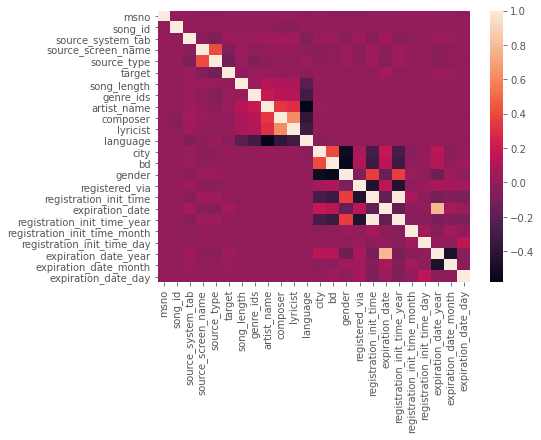

In [20]:
plt.figure(figsize=[7,5])
sns.heatmap(df.corr())
plt.show()

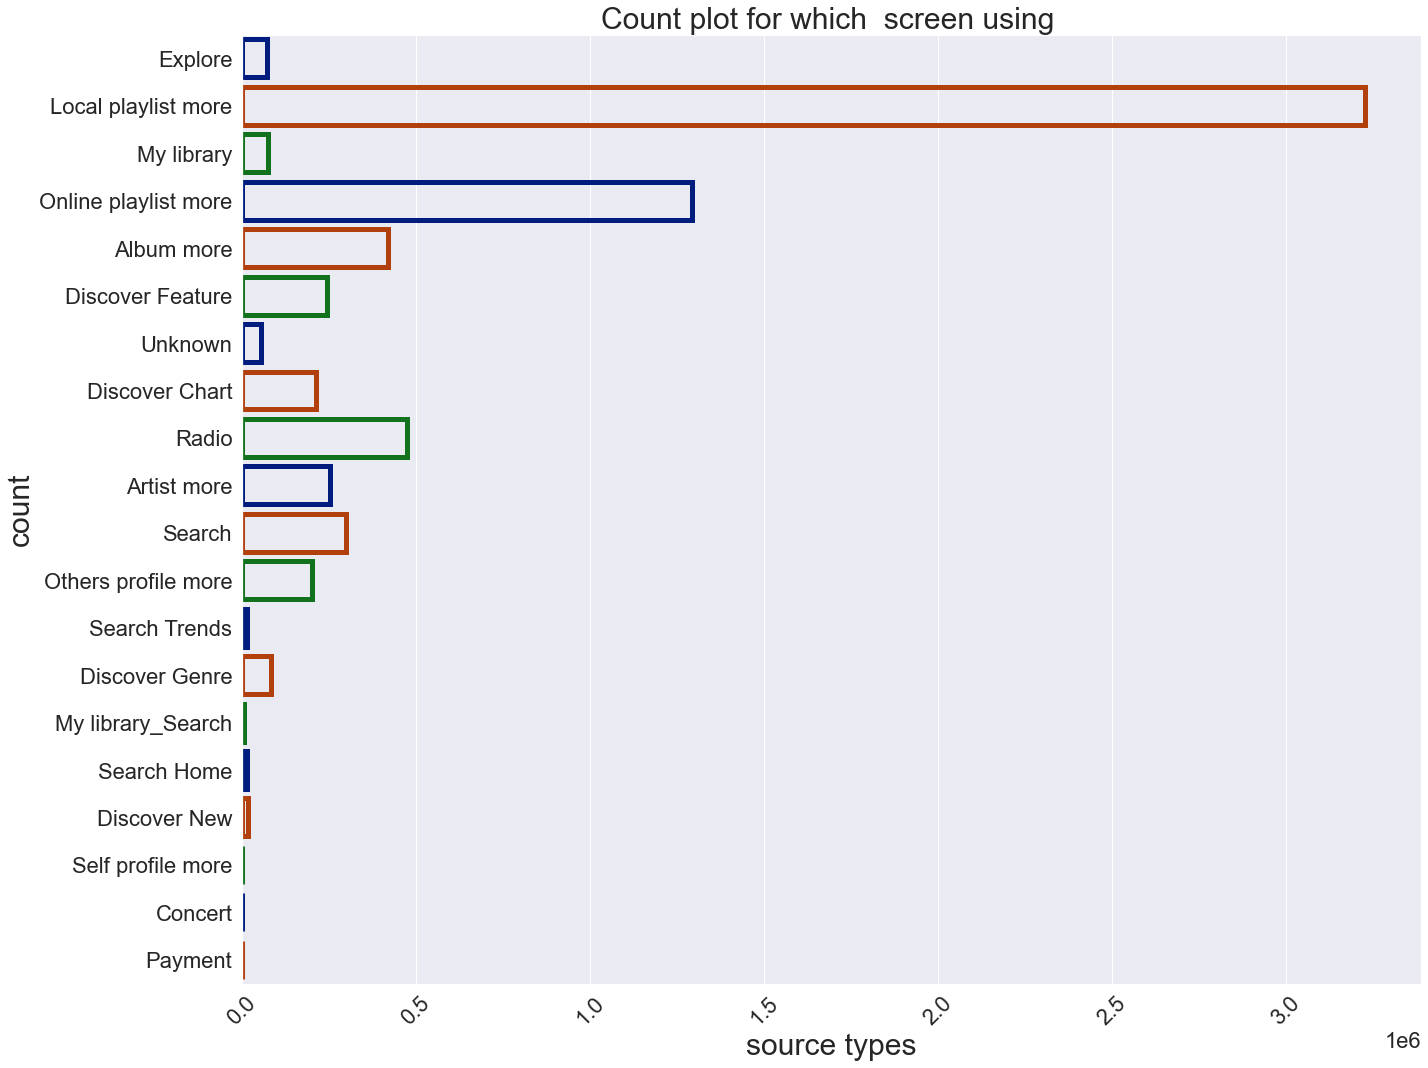

In [21]:
tra = pd.read_csv('train.csv')
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.countplot(y='source_screen_name',data=tra,facecolor=(0,0,0,0),linewidth=5,edgecolor=sns.color_palette('dark',3))
sns.set(style="darkgrid")
plt.xlabel('source types',fontsize=30)
plt.ylabel('count',fontsize=30)
plt.xticks(rotation='45')
plt.title('Count plot for which  screen using ',fontsize=30)
plt.tight_layout()

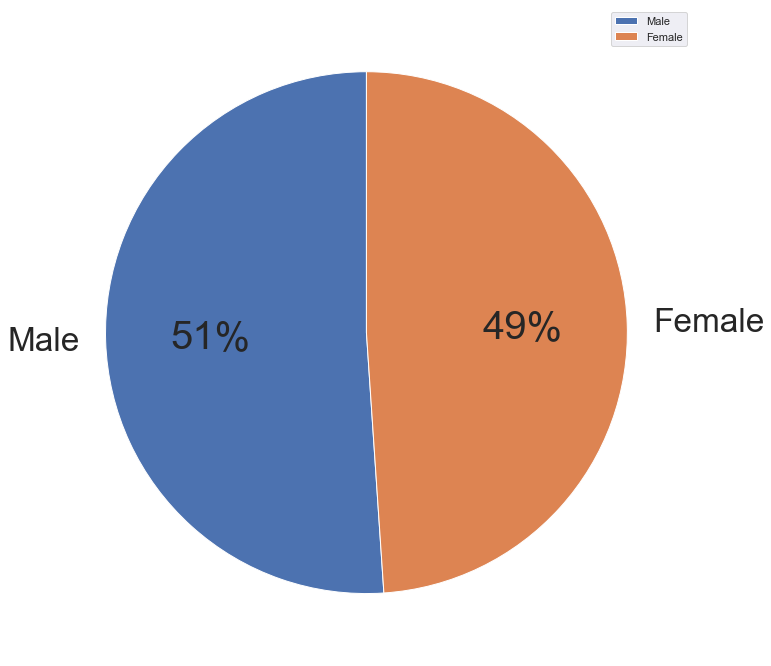

In [22]:
import matplotlib as mpl
members = pd.read_csv('members.csv')

mpl.rcParams['font.size'] = 40.0
labels = ['Male','Female']
plt.figure(figsize = (12, 12))
sizes = pd.value_counts(members.gender)
patches, texts, autotexts = plt.pie(sizes, 
                                    labels=labels, autopct='%.0f%%',
                                    shadow=False, radius=1,startangle=90)
for t in texts:
    t.set_size('smaller')
plt.legend()
plt.show()

DEFINING THE MACHINE LEARNING MODEL

In [23]:
# Model with the best estimator
model = ensemble.RandomForestClassifier(n_estimators=250, max_depth=25)
model.fit(df[df.columns[df.columns != 'target']], df.target)

RandomForestClassifier(max_depth=25, n_estimators=250)

In [24]:
df_plot = pd.DataFrame({'features': df.columns[df.columns != 'target'],
                        'importances': model.feature_importances_})
df_plot = df_plot.sort_values('importances', ascending=False)

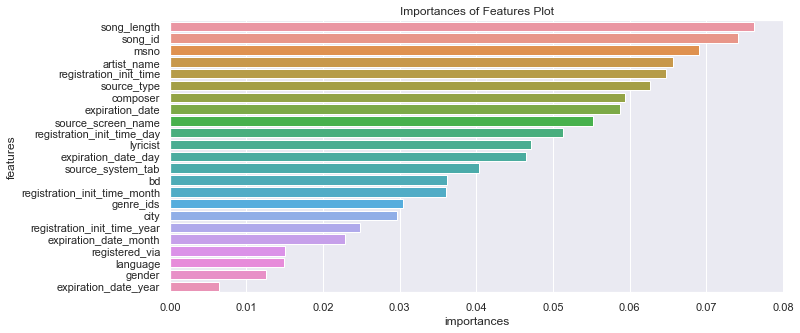

In [25]:
plt.figure(figsize=[11,5])
sns.barplot(x = df_plot.importances, y = df_plot.features)
plt.title('Importances of Features Plot')
plt.show()

In [26]:
model.feature_importances_

array([0.06904944, 0.07420234, 0.04034095, 0.05524995, 0.06261092,
       0.07629264, 0.03042132, 0.06568546, 0.05939966, 0.0471186 ,
       0.01495964, 0.02970266, 0.03611283, 0.01251367, 0.01501754,
       0.06477787, 0.05876326, 0.02480517, 0.03603249, 0.05129505,
       0.00640027, 0.02279956, 0.04644869])

In [27]:
df = df.drop(df_plot.features[df_plot.importances < 0.04].tolist(), 1)

In [28]:
list(df.columns)

['msno',
 'song_id',
 'source_system_tab',
 'source_screen_name',
 'source_type',
 'target',
 'song_length',
 'artist_name',
 'composer',
 'lyricist',
 'registration_init_time',
 'expiration_date',
 'registration_init_time_day',
 'expiration_date_day']

In [29]:
target = df.pop('target')

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
train_data, test_data, train_labels, test_labels = train_test_split(df, target, test_size = 0.3)
model = xgb.XGBClassifier(learning_rate=0.1, max_depth=15, min_child_weight=5, n_estimators=250)
model.fit(train_data, train_labels)

[12:26:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=250, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
predict_labels = model.predict(test_data)
print(metrics.classification_report(test_labels, predict_labels))

              precision    recall  f1-score   support

           0       0.68      0.64      0.66    109953
           1       0.67      0.70      0.68    111370

    accuracy                           0.67    221323
   macro avg       0.67      0.67      0.67    221323
weighted avg       0.67      0.67      0.67    221323

